In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import pyBigWig
import pysam
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style_2.txt')

In [6]:
k27 = pyBigWig.open('../data/outside/ChIP_seq/H3K27me3.bigWig')
k4 = pyBigWig.open('../data/outside/ChIP_seq/H3K4me2.bigWig')
rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

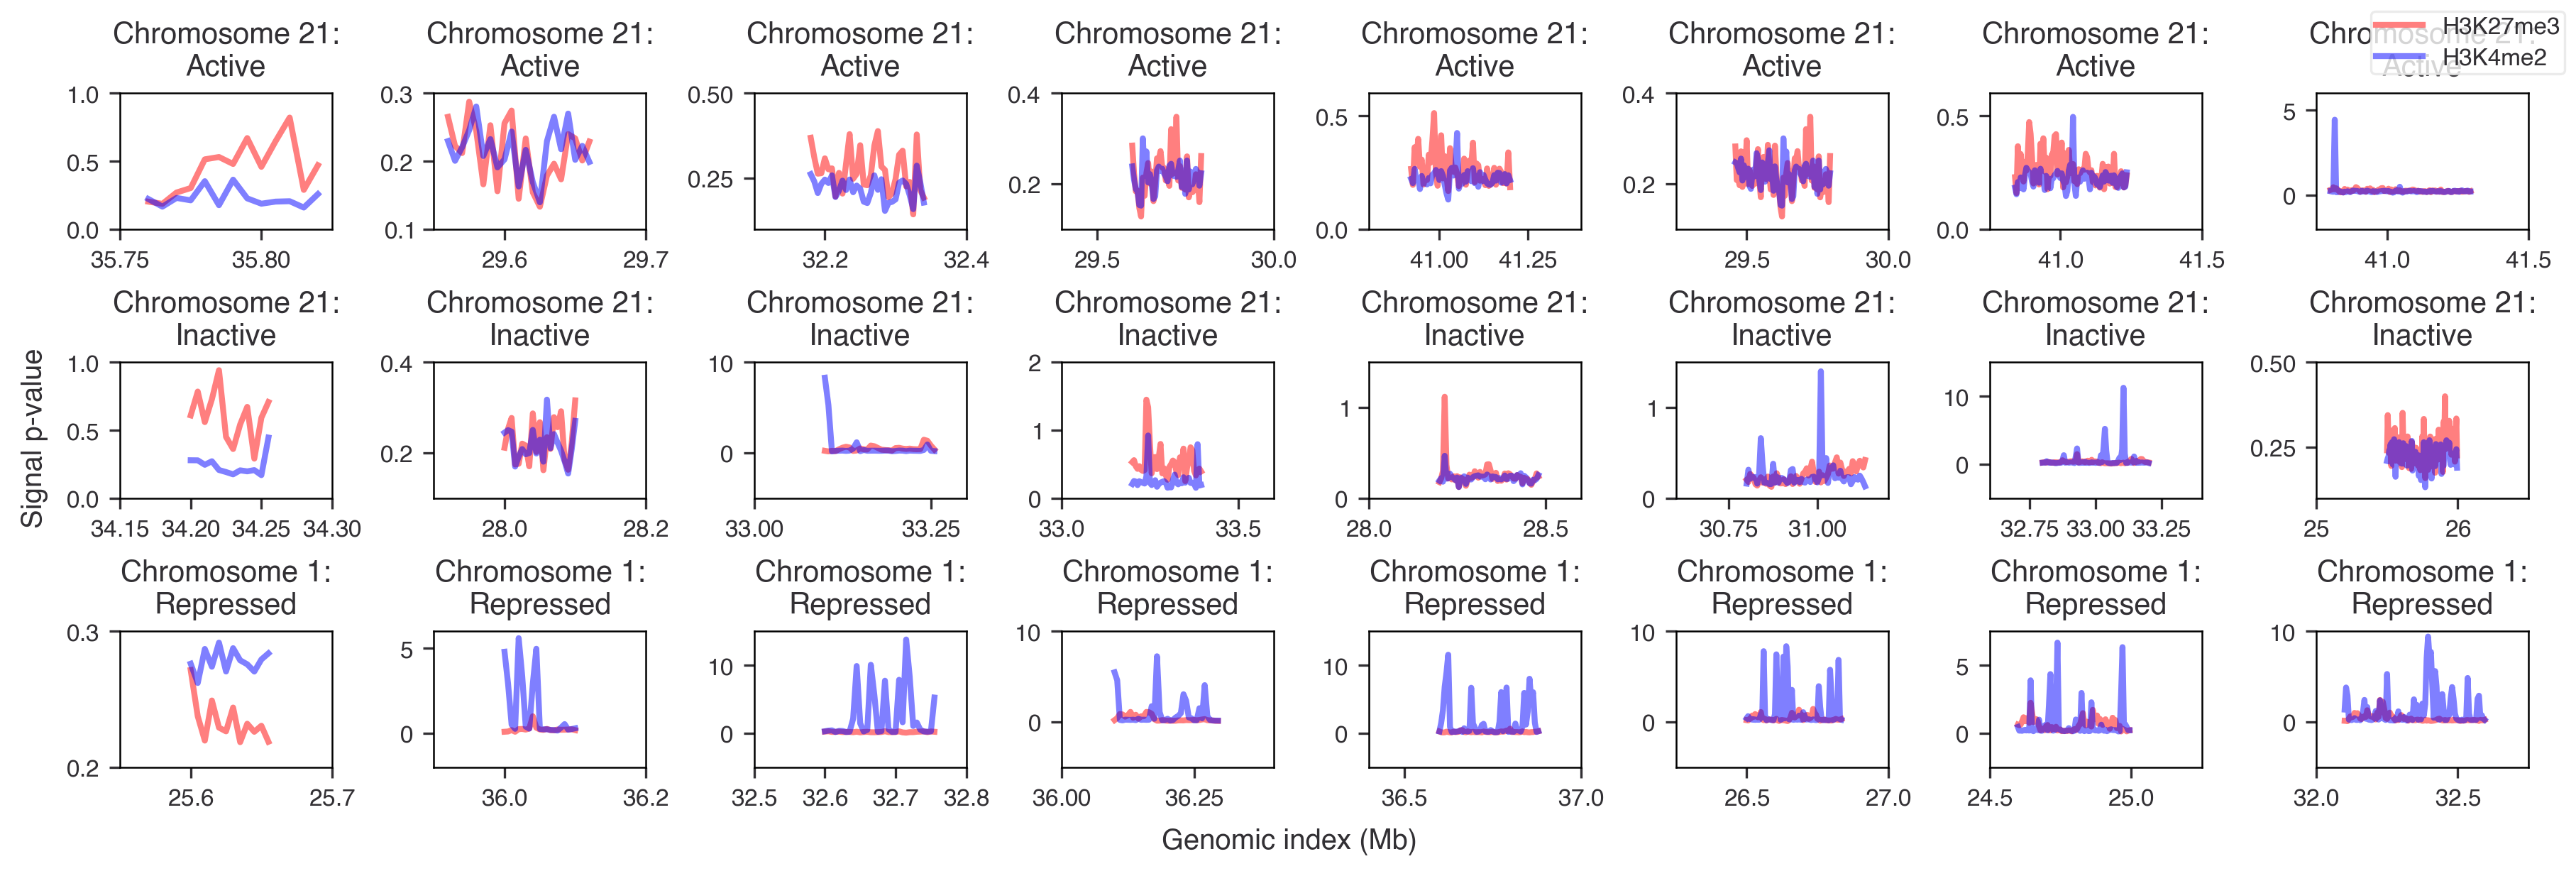

In [7]:
bin_size = 5_000

genomic_indices = {
    '1':[
        # Repressed
        (25.6,25.66),
        (36,36.1),
        (32.6,32.76),
        (36.1,36.3),
        (36.6,36.88),
        (26.5,26.84),
        (24.6,25),
        (32.1,32.6)
    ],
    '21':[
        # Active
        (35.76,35.82),
        (29.56,29.66),
        (32.18,32.34),
        (29.6,29.8),
        (40.92,41.2),
        (29.46,29.8),
        (40.84,41.24),
        (40.8,41.3),
        # Inactive
        (34.2,34.26),
        (28,28.1),
        (33.1,33.26),
        (33.2,33.4),
        (28.2,28.48),
        (30.8,31.14),
        (32.8,33.2),
        (25.5,26)
    ]
}

n_active = 0 
n_inactive = 0
n_repressed = 0 

fig,axes = plt.subplots(nrows=3,ncols=8,figsize=(12,4),layout='constrained')

for chrom, start_stop in genomic_indices.items():
    for start,stop in start_stop:
        i = int(round(start * 1e6))
        j = int(round(stop * 1e6))
        x = torch.arange(start,stop,round(bin_size/1e6,6)).tolist()
        nBins = len(x)
        
        if chrom == '1':
            activation = 'repressed'
            ax = axes[2][n_repressed]
            n_repressed+=1
        elif start in [35.76,29.56,32.18,29.6,40.92,29.46,40.84,40.8]:
            activation = 'active'
            ax = axes[0][n_active]
            n_active+=1
        else:
            activation = 'inactive'
            ax = axes[1][n_inactive]
            n_inactive+=1


        ax.plot(
            x,
            k27.stats('chr'+chrom, i,j,nBins=nBins),
            color='red',
            label='H3K27me3',
            alpha=.5
        )

        ax.plot(
            x,
            k4.stats('chr'+chrom, i,j,nBins=nBins),
            color='blue',
            label='H3K4me2',
            alpha=.5
        )

        ax.set_title(f'Chromosome {chrom}:' + '\n' + activation[0].upper() + activation[1:])
        #ax.set_xlabel('Genomic index (Mb)')
        
        #if activation == 'active' and n_active == 1:
        #    ax.legend()
        

        
fig.supxlabel('Genomic index (Mb)')
fig.supylabel('Signal p-value')
fig.legend(['H3K27me3','H3K4me2'])

ValueError: x and y must have same first dimension, but have shapes (400001,) and (400000,)

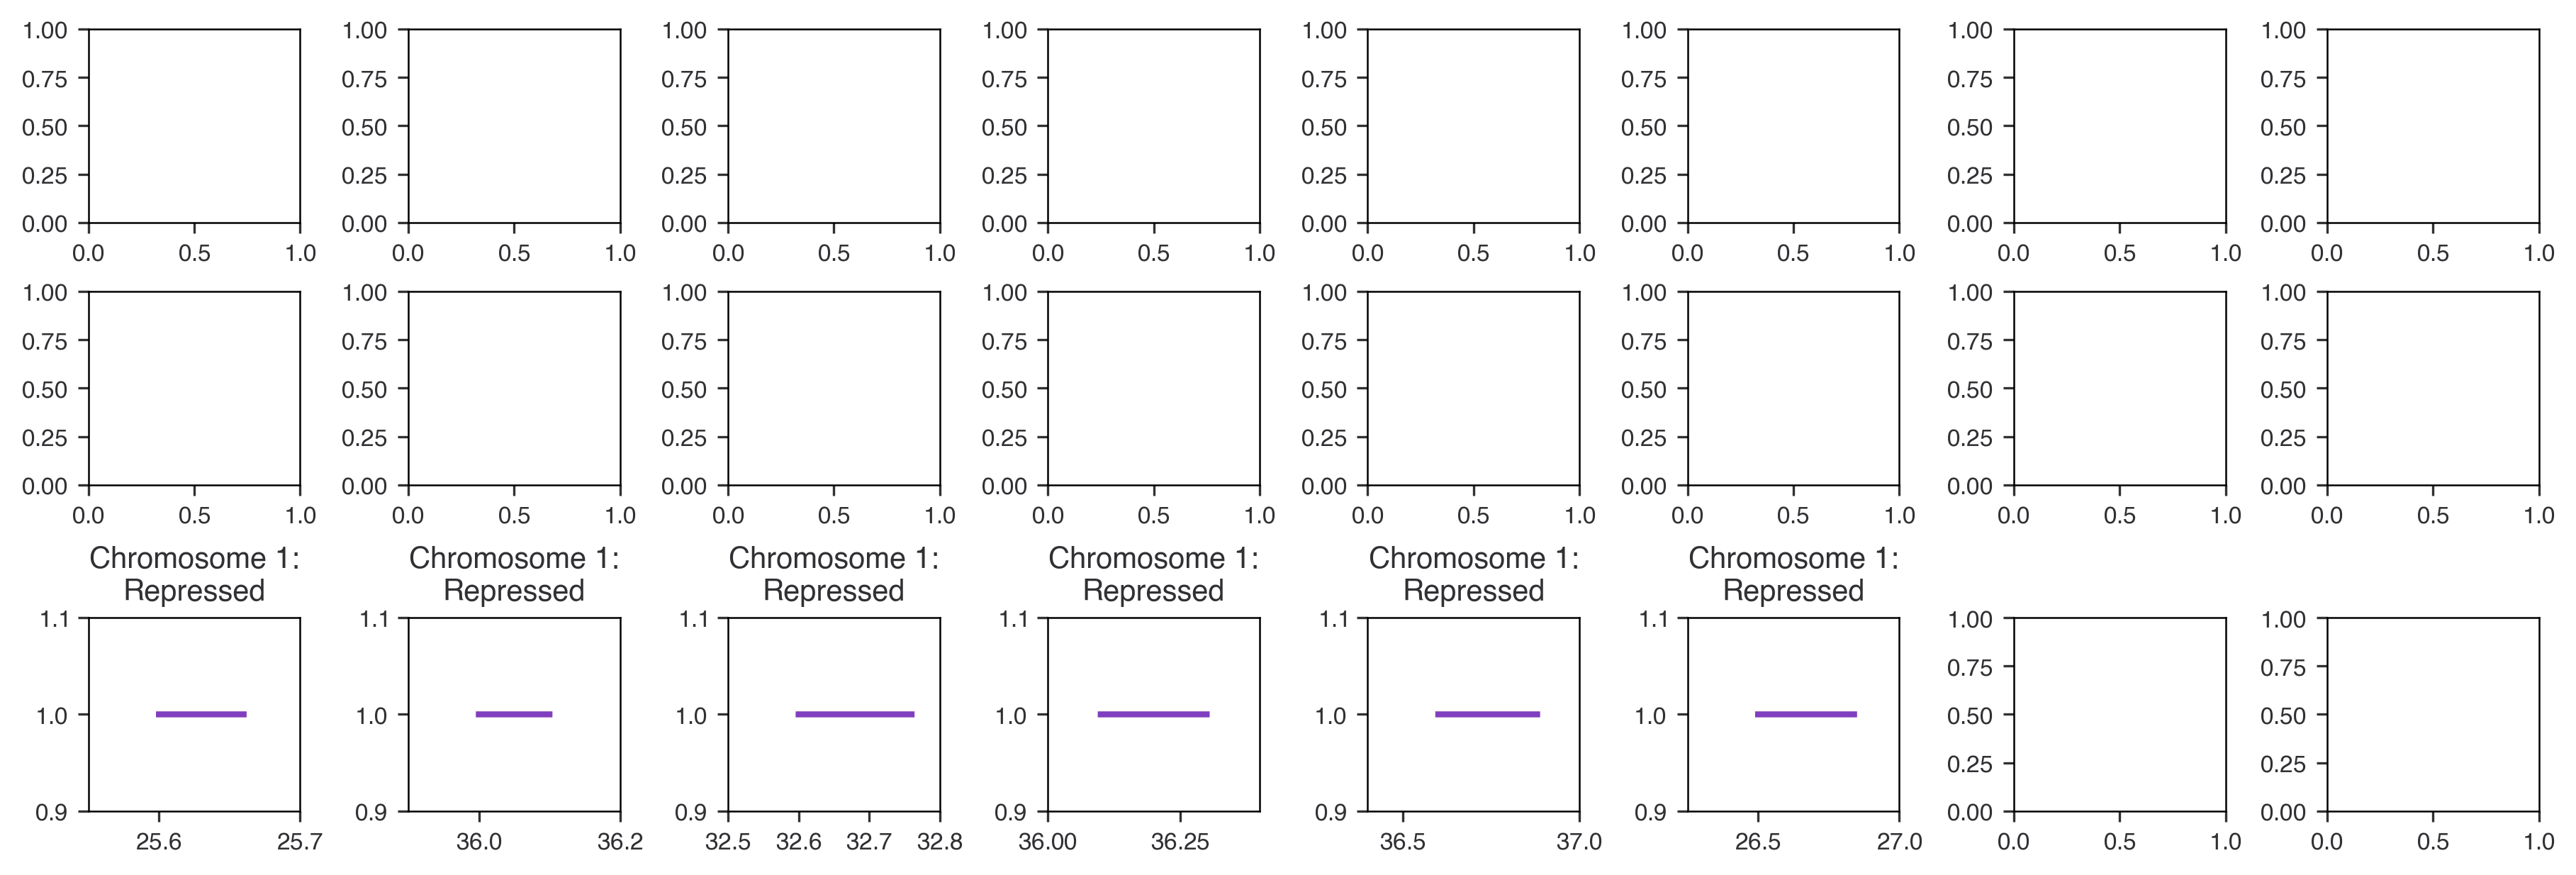

In [40]:
bin_size = 5_000

genomic_indices = {
    '1':[
        # Repressed
        (25.6,25.66),
        (36,36.1),
        (32.6,32.76),
        (36.1,36.3),
        (36.6,36.88),
        (26.5,26.84),
        (24.6,25),
        (32.1,32.6)
    ],
    '21':[
        # Active
        (35.76,35.82),
        (29.56,29.66),
        (32.18,32.34),
        (29.6,29.8),
        (40.92,41.2),
        (29.46,29.8),
        (40.84,41.24),
        (40.8,41.3),
        # Inactive
        (34.2,34.26),
        (28,28.1),
        (33.1,33.26),
        (33.2,33.4),
        (28.2,28.48),
        (30.8,31.14),
        (32.8,33.2),
        (25.5,26)
    ]
}

n_active = 0 
n_inactive = 0
n_repressed = 0 

fig,axes = plt.subplots(nrows=3,ncols=8,figsize=(12,4),layout='constrained')

for chrom, start_stop in genomic_indices.items():
    for start,stop in start_stop:
        i = int(round(start * 1e6))
        j = int(round(stop * 1e6))
        x = torch.arange(start,stop,(stop-start)/(j-i)).tolist()
        nBins = len(x)
        
        if chrom == '1':
            activation = 'repressed'
            ax = axes[2][n_repressed]
            n_repressed+=1
        elif start in [35.76,29.56,32.18,29.6,40.92,29.46,40.84,40.8]:
            activation = 'active'
            ax = axes[0][n_active]
            n_active+=1
        else:
            activation = 'inactive'
            ax = axes[1][n_inactive]
            n_inactive+=1


        ax.plot(
            x,
            k27.stats('chr'+chrom, i,j,nBins=j-i,type='coverage'),
            color='red',
            label='H3K27me3',
            alpha=.5
        )

        ax.plot(
            x,
            k4.stats('chr'+chrom, i,j,nBins=j-i,type='coverage'),
            color='blue',
            label='H3K4me2',
            alpha=.5
        )

        ax.set_title(f'Chromosome {chrom}:' + '\n' + activation[0].upper() + activation[1:])
        
fig.supxlabel('Genomic index (Mb)')
fig.supylabel('Signal p-value')
fig.legend(['H3K27me3','H3K4me2'])

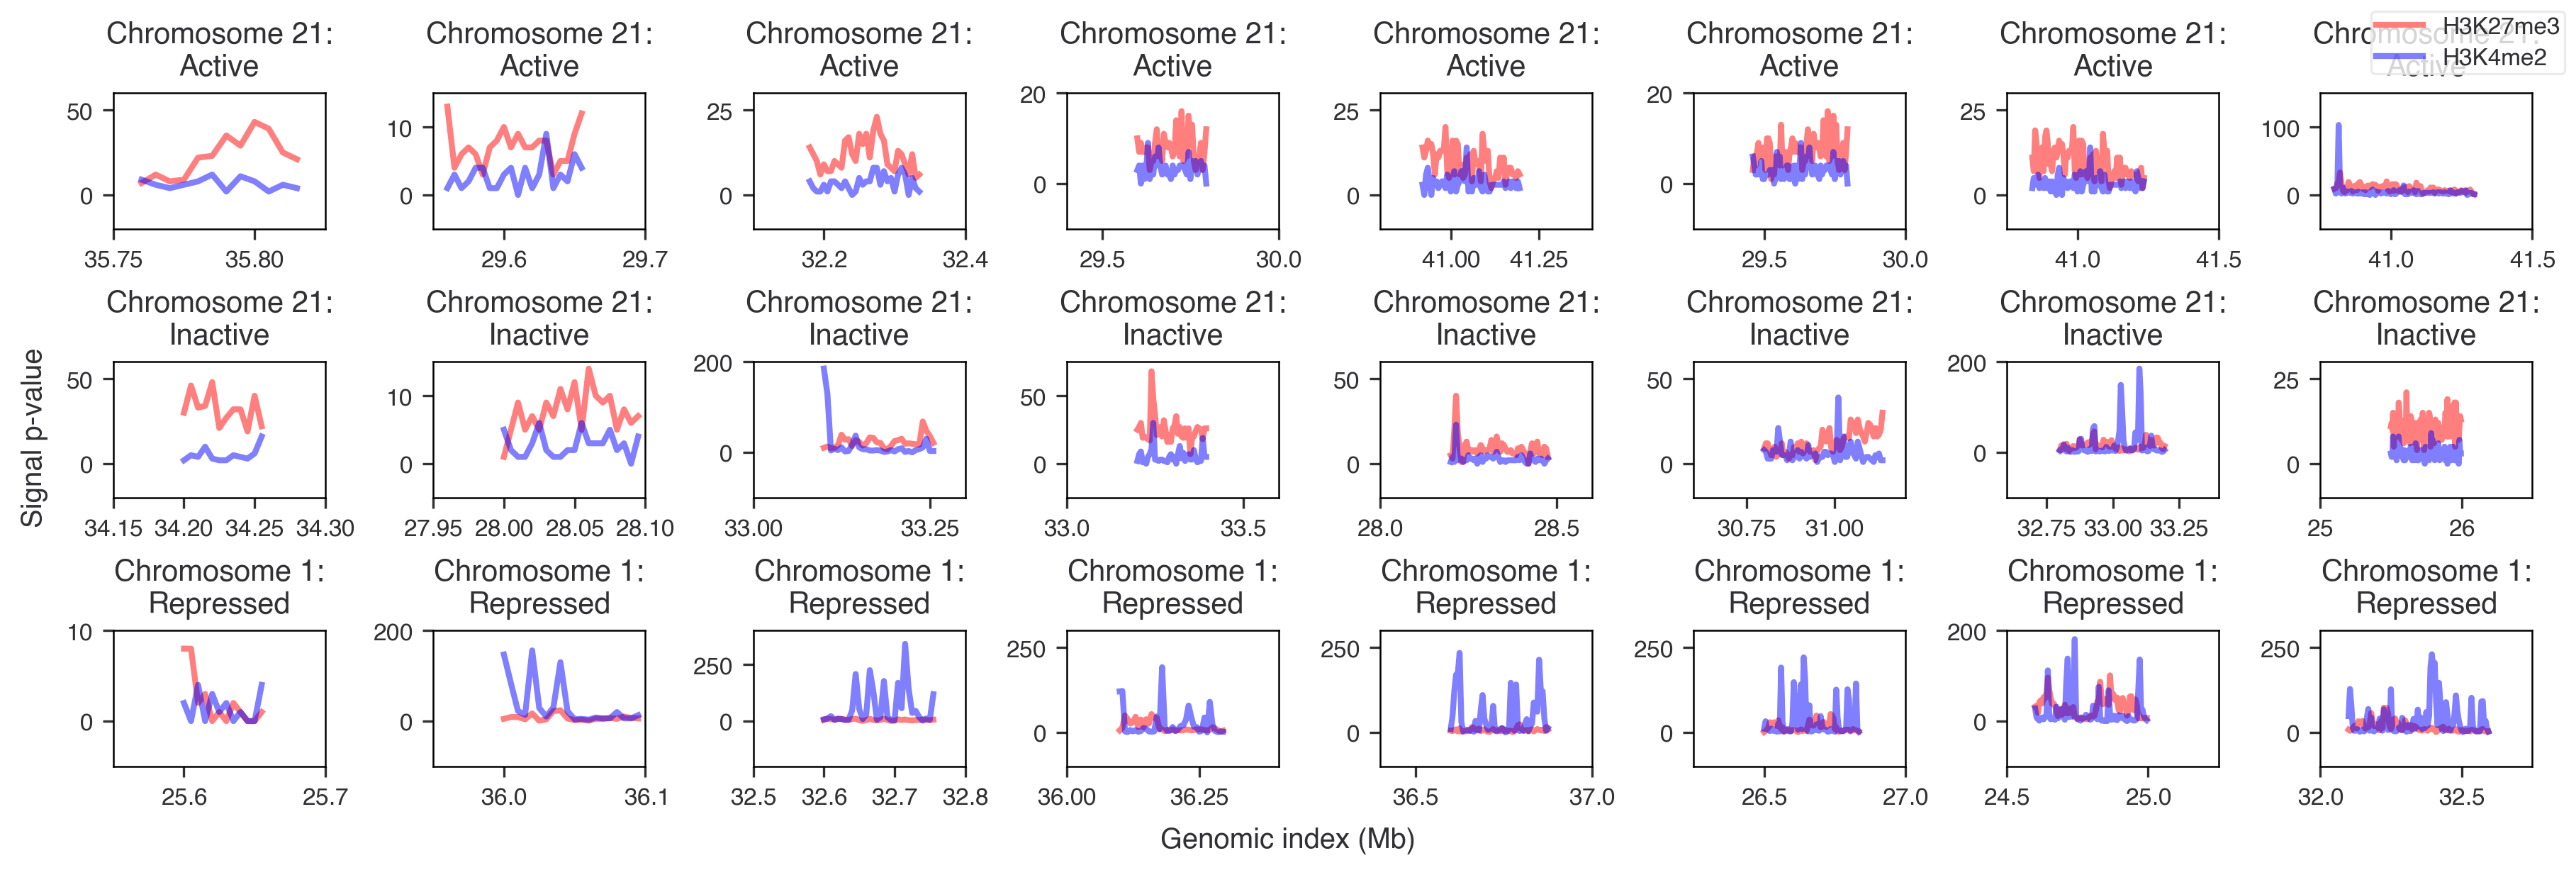

In [35]:
bin_size = 5_000

k27_bam = pysam.AlignmentFile('../data/outside/ChIP_seq/H3K27me3_1.bam', 'rb')
k4_bam = pysam.AlignmentFile('../data/outside/ChIP_seq/H3K4me2_1.bam', 'rb')
rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

genomic_indices = {
    '1':[
        # Repressed
        (25.6,25.66),
        (36,36.1),
        (32.6,32.76),
        (36.1,36.3),
        (36.6,36.88),
        (26.5,26.84),
        (24.6,25),
        (32.1,32.6)
    ],
    '21':[
        # Active
        (35.76,35.82),
        (29.56,29.66),
        (32.18,32.34),
        (29.6,29.8),
        (40.92,41.2),
        (29.46,29.8),
        (40.84,41.24),
        (40.8,41.3),
        # Inactive
        (34.2,34.26),
        (28,28.1),
        (33.1,33.26),
        (33.2,33.4),
        (28.2,28.48),
        (30.8,31.14),
        (32.8,33.2),
        (25.5,26)
    ]
}

n_active = 0 
n_inactive = 0
n_repressed = 0 

fig,axes = plt.subplots(nrows=3,ncols=8,figsize=(12,4),layout='constrained')

for chrom, start_stop in genomic_indices.items():
    for start,stop in start_stop:
        i = int(round(start * 1e6))
        j = int(round(stop * 1e6))
        x_true = torch.arange(i,j,bin_size)
        x = x_true / 1e6
        #x = torch.arange(start,stop,round(bin_size/1e6,6)).tolist()
        nBins = len(x)
        
        if chrom == '1':
            activation = 'repressed'
            ax = axes[2][n_repressed]
            n_repressed+=1
        elif start in [35.76,29.56,32.18,29.6,40.92,29.46,40.84,40.8]:
            activation = 'active'
            ax = axes[0][n_active]
            n_active+=1
        else:
            activation = 'inactive'
            ax = axes[1][n_inactive]
            n_inactive+=1


        delta = x_true[1]-x_true[0]
        y = [
            k27_bam.count('chr'+chrom, xx,xx+delta) for xx in x_true
        ]
        ax.plot(
            x,
            y,
            color='red',
            label='H3K27me3',
            alpha=.5
        )

        y = [
            k4_bam.count('chr'+chrom, xx,xx+delta) for xx in x_true
        ]
        ax.plot(
            x,
            y,
            color='blue',
            label='H3K4me2',
            alpha=.5
        )

        ax.set_title(f'Chromosome {chrom}:' + '\n' + activation[0].upper() + activation[1:])
        #ax.set_xlabel('Genomic index (Mb)')
        
        #if activation == 'active' and n_active == 1:
        #    ax.legend()
        
fig.supxlabel('Genomic index (Mb)')
fig.supylabel('Signal p-value')
fig.legend(['H3K27me3','H3K4me2'])

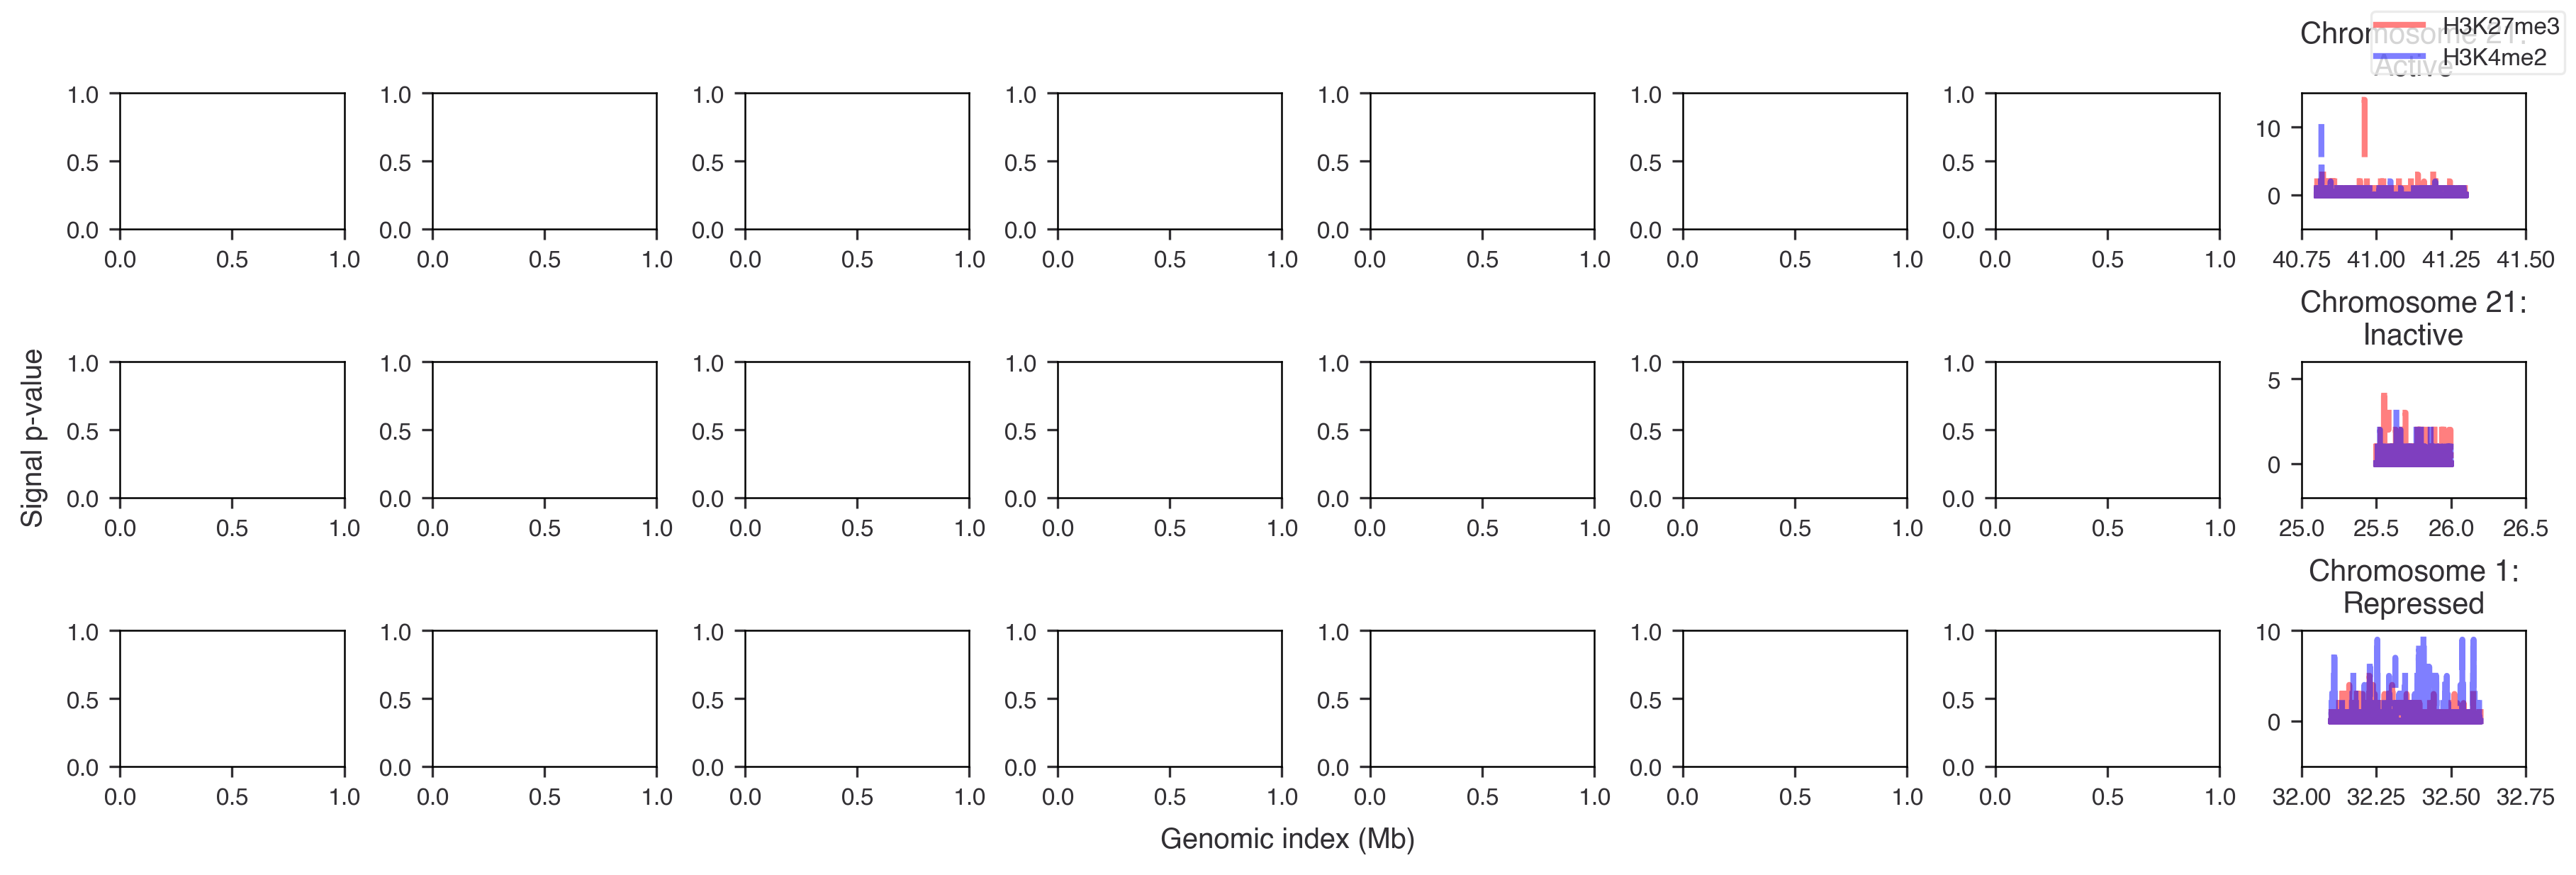

In [56]:
bin_size = 10#5_000

k27_bam = pysam.AlignmentFile('../data/outside/ChIP_seq/H3K27me3_Yifeng.bam', 'rb')
k4_bam = pysam.AlignmentFile('../data/outside/ChIP_seq/H3K4me2_Yifeng.bam', 'rb')
control_bam = pysam.AlignmentFile('../data/outside/ChIP_seq/control_Yifeng.bam','rb')
rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

genomic_indices = {
    '1':[
        # Repressed
        (25.6,25.66),
        (36,36.1),
        (32.6,32.76),
        (36.1,36.3),
        (36.6,36.88),
        (26.5,26.84),
        (24.6,25),
        (32.1,32.6)
    ],
    '21':[
        # Active
        (35.76,35.82),
        (29.56,29.66),
        (32.18,32.34),
        (29.6,29.8),
        (40.92,41.2),
        (29.46,29.8),
        (40.84,41.24),
        (40.8,41.3),
        # Inactive
        (34.2,34.26),
        (28,28.1),
        (33.1,33.26),
        (33.2,33.4),
        (28.2,28.48),
        (30.8,31.14),
        (32.8,33.2),
        (25.5,26)
    ]
}

n_active = 0 
n_inactive = 0
n_repressed = 0 

fig,axes = plt.subplots(nrows=3,ncols=8,figsize=(12,4),layout='constrained')

for chrom, start_stop in genomic_indices.items():
    for start,stop in start_stop:
        
        i = int(round(start * 1e6))
        j = int(round(stop * 1e6))
        x_true = torch.arange(i,j,bin_size)
        x = x_true / 1e6
        #x = torch.arange(start,stop,round(bin_size/1e6,6)).tolist()
        nBins = len(x)
        
        if chrom == '1':
            activation = 'repressed'
            ax = axes[2][n_repressed]
            n_repressed+=1
            n=n_repressed
        elif start in [35.76,29.56,32.18,29.6,40.92,29.46,40.84,40.8]:
            activation = 'active'
            ax = axes[0][n_active]
            n_active+=1
            n=n_active
        else:
            activation = 'inactive'
            ax = axes[1][n_inactive]
            n_inactive+=1
            n=n_inactive

        ##########
        #if chrom != '1' or start != 32.1:
        #    continue
        if n != 8:
            continue
        #########


        delta = x_true[1]-x_true[0]
        control = torch.tensor([
            control_bam.count('chr'+chrom, xx,xx+delta) for xx in x_true
        ])
        
        y = torch.tensor([
            k27_bam.count('chr'+chrom, xx,xx+delta) for xx in x_true
        ]) / control
        ax.plot(
            x.numpy(),
            y.numpy(),
            color='red',
            label='H3K27me3',
            alpha=.5
        )

        y = torch.tensor([
            k4_bam.count('chr'+chrom, xx,xx+delta) for xx in x_true
        ]) / control
        ax.plot(
            x.numpy(),
            y.numpy(),
            color='blue',
            label='H3K4me2',
            alpha=.5
        )

        ax.set_title(f'Chromosome {chrom}:' + '\n' + activation[0].upper() + activation[1:])
        #ax.set_xlabel('Genomic index (Mb)')
        
        #if activation == 'active' and n_active == 1:
        #    ax.legend()
        
fig.supxlabel('Genomic index (Mb)')
fig.supylabel('Signal p-value')
fig.legend(['H3K27me3','H3K4me2'])

In [8]:
import sys
sys.path.insert(0,'../code/data_utils/SampleClass/')
from Coordinates import Coordinates

In [10]:
all_coords = Coordinates('/home/gridsan/gschuette/binz_group_shared/gkks/with_Zhuohan/conformations/Tan/unguided_equivalent.pt')

In [14]:
for i in range(0,200_000,10_000):
    j = min(i+10_000,len(all_coords))

    temp_map = all_coords[i:j,...].distances.mean
    if i+10_000 != j:
        temp_map._values*= 10_000 / (j-i)
    
    if i == 0:
        mean_map = temp_map
    else:
        mean_map._values+= temp_map.values

mean_map._values/= 20
mean_map._values*= 100 # to nm

In [3]:
regions = {
    '1': [1123, 1644, 1476, 1652, 1679, 1175, 1082, 1459],
    '21': [1000,691,824,696,1264,692,1263,1263,922,613,870,876,628,759,861,498]
}

len(list(range(0,200_000,10_000)))

20

(<Figure size 1920x1440 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7f75b9e4c430>)

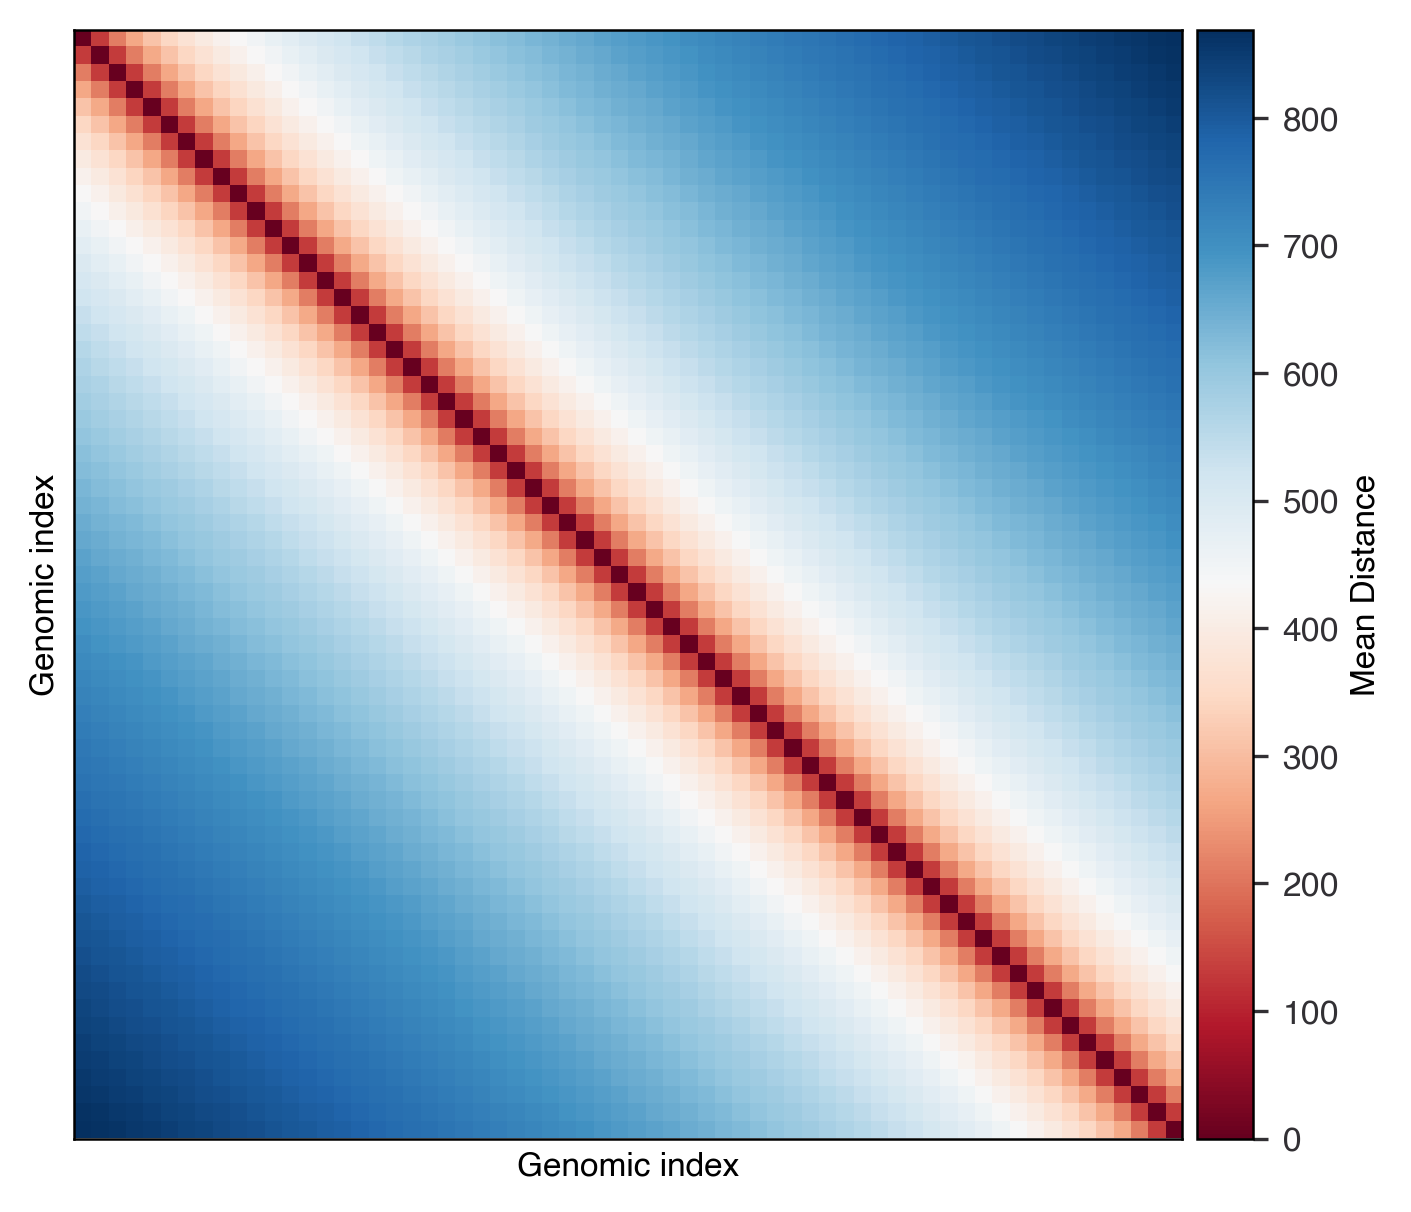

In [15]:
mean_map.plot()